# Расчет сложной модели

## Подключение библиотек

In [1]:
from nrs import NRS_Model, Element, NRS_Revision, NRS_Observer_E    # классы НРС
from nrs import NRS_Data as nd                                      # Табличные данные НРС
from nrs import q_out_simple, q_out_nozzle                          # модели расчета параметров
import matplotlib.pyplot as plt                                     # библиотеки для отрисовки получаемых данных

## Модель НРС
![модель НРС](nrs_1.jpg)
Схема НРС состоит из:
* 1 источника в виде насоса ПА
* 2 магистральных рукавных линий
* 2 рукавных разветвлений
* 5 рабочих рукавных линий
* 5 приборов подачи воды

### Модель 1
* Источник (Насос): АЦ-40
* Магистральная рукавная линия (МРЛ Н-Р1): 3 пожарные напорные рукава диаметром 77мм
* Магистральная рукавная линия (МРЛ Р1-Р2): 3 пожарные напорные рукава диаметром 77мм
* Рукавное разветвление (Р1): Стандартное
* Рабочая рукавная линия (РРЛ Р1-Ств1): 3 пожарные напорные рукава диаметром 51мм
* Ствол 1 (Ств1): Ручной ствол "Б"
* Рабочая рукавная линия (РРЛ Р1-Ств2): 1 пожарные напорные рукава диаметром 51мм
* Ствол 2 (Ств2): Ручной ствол "Б"
* Рукавное разветвление (Р2): Стандартное
* Рабочая рукавная линия (РРЛ Р2-Ств3): 1 пожарные напорные рукава диаметром 51мм
* Ствол 3 (Ств3): Ручной ствол "Б"
* Рабочая рукавная линия (РРЛ Р2-Ств4): 1 пожарные напорные рукава диаметром 77мм
* Ствол 4 (Ств4): Ручной ствол "А"
* Рабочая рукавная линия (РРЛ Р2-Ств5): 3 пожарные напорные рукава диаметром 51мм
* Ствол 5 (Ств5): Ручной ствол "Б"

In [2]:
# Вычисляем проводимости гладкоствольных насадков для стволов Б (13мм) и А (19мм)
p_B = NRS_Revision.calc_p(3.7, 40)
p_A = NRS_Revision.calc_p(7.4, 40)

# Эксперименты

## Эксперимент 1-1
Модель: Модель 1
Условия:
* Стартовый напор на насосе - 40м

Задача:
* Рассчитать общий расход модели
* Рассчитать расходы на приборах подачи воды

In [21]:
# Создаем модель НРС:
model = NRS_Model('Модель от одного насоса к пяти стволам через два разветвления')

# Создаем элементы модели:
pump = Element('Н1', 0, H_add=40)                                       # Насос
hoseM_1 = Element('МРЛ Н-Р1', 1, s=nd.ss["77"], n=3)                    # магистральная рукавная линия №1 - от насоса к разветвлению №1

splitter_1 = Element('Р1', 1, ro=3)                                           # разветвление №1
hoseW_11 = Element('РРЛ Р1-1', 1, s=nd.ss["51"], n=3)                   # рабочая рукавная линия от разветвления №1 к стволу №1
nozzle_11 = Element('Ствол Р1-1(Б)', 2, p=p_B, q_out = q_out_nozzle)  # ствол №1
hoseW_12 = Element('РРЛ Р1-2', 1, s=nd.ss["51"], n=1)                   # рабочая рукавная линия от разветвления №1 к стволу №2
nozzle_12 = Element('Ствол Р1-2(Б)', 2, p=p_B, q_out = q_out_nozzle)  # ствол №2
hoseM_12 = Element('МРЛ Р1-Р2', 1, s=nd.ss["77"], n=3)                  # магистральная рукавная линия №2 - от разветвления №1 к разветвлению №2

splitter_2 = Element('Р2', 1, ro=3)                                           # разветвление №2
hoseW_21 = Element('РРЛ Р2-1', 1, s=nd.ss["51"], n=1)                   # рабочая рукавная линия от разветвления №2 к стволу №3
nozzle_21 = Element('Ствол Р2-1(Б)', 2, p=p_B, q_out = q_out_nozzle)  # ствол №3
hoseW_22 = Element('РРЛ Р2-2', 1, s=nd.ss["77"], n=1)                   # рабочая рукавная линия от разветвления №2 к стволу №4
nozzle_22 = Element('Ствол Р2-2(А)', 2, p=p_A, q_out = q_out_nozzle)   # ствол №4
hoseW_23 = Element('РРЛ Р2-3', 1, s=nd.ss["51"], n=3)                   # рабочая рукавная линия от разветвления №2 к стволу №5
nozzle_23 = Element('Ствол Р2-3(Б)', 2, p=p_B, q_out = q_out_nozzle)  # ствол №5

# Соединяем элементы модели вместе в НРС:
# Магистральная часть:
pump.append(hoseM_1).append(splitter_1).append(hoseM_12).append(splitter_2)     # Насос-МРЛ1-Разветвление№1-МРЛ2-Разветвление№2

splitter_1.append(hoseW_11).append(nozzle_11)   # Рукавная линия от разветвления №1 к стволу №1
splitter_1.append(hoseW_12).append(nozzle_12)   # Рукавная линия от разветвления №1 к стволу №2

splitter_2.append(hoseW_21).append(nozzle_21)   # Рукавная линия от разветвления №2 к стволу №3
splitter_2.append(hoseW_22).append(nozzle_22)   # Рукавная линия от разветвления №2 к стволу №4
splitter_2.append(hoseW_23).append(nozzle_23)   # Рукавная линия от разветвления №2 к стволу №5

# Добавляем обозревателей:
NRS_Observer_E(pump, ['q', 'H_add'])             # Для насоса
NRS_Observer_E(nozzle_11, ['q', 'H_in'])         # Для ствола №1
NRS_Observer_E(nozzle_12, ['q', 'H_in'])         # Для ствола №2
NRS_Observer_E(nozzle_21, ['q', 'H_in'])         # Для ствола №3
NRS_Observer_E(nozzle_22, ['q', 'H_in'])         # Для ствола №4
NRS_Observer_E(nozzle_23, ['q', 'H_in'])         # Для ствола №5

# Строим модель и инициируем обозревателей:
model.build(pump, interpretate=True)
model.observersInit()

# Расчет НРС:
model.calc(accuracy=0.05, fixStates=True)

# Печать результата расчета
print('=== Qобщ=' + str(model.summaryQ()) + 'л/с')

Новая модель: Модель от одного насоса к пяти стволам через два разветвления
=== Qобщ=16.67482736678151л/с


In [22]:
# Печать описания модели
NRS_Revision.print_model_elements(model)

all:
  Н1
  МРЛ Н-Р1
  Р1
  МРЛ Р1-Р2
  Р2
  РРЛ Р2-1
  Ствол Р2-1(Б)
  РРЛ Р2-2
  Ствол Р2-2(А)
  РРЛ Р2-3
  Ствол Р2-3(Б)
  РРЛ Р1-1
  Ствол Р1-1(Б)
  РРЛ Р1-2
  Ствол Р1-2(Б)
in:
  Н1
out:
  Ствол Р2-1(Б)
  Ствол Р2-2(А)
  Ствол Р2-3(Б)
  Ствол Р1-1(Б)
  Ствол Р1-2(Б)


In [23]:
def plotModelState():
    '''
        Функция построения итоговых графиков:
    '''

    # Расход всей системы
    plt.figure(figsize=(12, 8))
    plt.plot(pump.history()['q'], label='НРС в целом')

    plt.legend(title='Проиводительность НРС:')
    plt.xlabel('итерации')
    plt.ylabel('Q, л/с')
    plt.show()

    # Напоры и расходы на стволах
    plt.figure(figsize=(12, 8))
    plt.plot(nozzle_11.history()['q'], label=nozzle_11.name)
    plt.plot(nozzle_12.history()['q'], label=nozzle_12.name)
    plt.plot(nozzle_21.history()['q'], label=nozzle_21.name)
    plt.plot(nozzle_22.history()['q'], label=nozzle_22.name)
    plt.plot(nozzle_23.history()['q'], label=nozzle_23.name)

    plt.legend(title='Проиводительность стволов:')
    plt.xlabel('итерации')
    plt.ylabel('Q, л/с')
    plt.show()

    plt.figure(figsize=(12, 8))
    plt.plot(nozzle_11.history()['H_in'], label=nozzle_11.name)
    plt.plot(nozzle_12.history()['H_in'], label=nozzle_12.name)
    plt.plot(nozzle_21.history()['H_in'], label=nozzle_21.name)
    plt.plot(nozzle_22.history()['H_in'], label=nozzle_22.name)
    plt.plot(nozzle_23.history()['H_in'], label=nozzle_23.name)

    plt.legend(title='Напоры на стволах:')
    plt.xlabel('итерации')
    plt.ylabel('Н, м')
    plt.show()

def printElementsQ():
    ''' Печать расходов на элементах модели '''
    print("Производительность насоса: ", pump.get_q_out(), "л/с")
    print("Производительность {}: {} л/с".format(nozzle_11.name, nozzle_11.get_q_out()))
    print("Производительность {}: {} л/с".format(nozzle_12.name, nozzle_12.get_q_out()))
    print("Производительность {}: {} л/с".format(nozzle_21.name, nozzle_21.get_q_out()))
    print("Производительность {}: {} л/с".format(nozzle_22.name, nozzle_22.get_q_out()))
    print("Производительность {}: {} л/с".format(nozzle_23.name, nozzle_23.get_q_out()))

### Фоновое приведение модели в стационарное состояние, до точности 0,05л/с:

In [24]:
# Основной вариант
model.calc(accuracy=0.05, fixStates=True)
# Фиксируем состояние модели для 10 итераций
# model.calc(iters=10, fixStates=True)

print('=== Qобщ=' + str(model.summaryQ()) + 'л/с')

=== Qобщ=16.66746479834789л/с


In [10]:
# # Альтернативный вариант (раскомментировать)
# # Предварительный прогон - для приведения НРС в стационарное (или исходное) состояние
# dbg=False                               # Флаг вывода отладочной информации
# prevIterations=50

# for i in range(prevIterations):
#     if dbg:
#         print(str(i) + "="*10 )
#         print('===Qобщ=' + str(pump.q) + 'л/с')

#     # Расчет модели
#     model.calc()

# print('=== Qобщ=' + str(model.summaryQ()) + 'л/с')
# # Инициация (Обнуление) обозревателей
# # model.observersInit()

In [11]:
# Печать общего расхода системы
model.summaryQ()

3.568111657684568

In [25]:
# Печать состояния насоса
print("="*10 + " Состояние насоса" + "="*10)
NRS_Revision.print_element_state(pump)
# Печать состояния ствола №3 (от 2 разветвления, ствол №1)
print("="*10 + " Состояние ствола №3" + "="*10)
NRS_Revision.print_element_state(nozzle_21)

========== Состояние насоса==========
elements_next: [<nrs.Element object at 0x000001CE12ECBFD0>]
elements_previous: []
type: 0
name: Н1
q: 16.66746479834789
s: 0
H_in: 0
h: 0.0
z: 0
p: 1
n: 1
q_out: <function q_out_simple at 0x000001CE0FFABB00>
H_add: 40
observer: <nrs.NRS_Observer_E object at 0x000001CE13660C50>
l: 0
ri: 1
ro: 1
H_out: 40.0
========== Состояние ствола №3==========
elements_next: []
elements_previous: [<nrs.Element object at 0x000001CE12EC94D0>]
type: 2
name: Ствол Р2-1(Б)
q: 2.7058687390941696
s: 0
H_in: 21.39291638628801
h: 0
z: 0
p: 0.5850213671311502
n: 1
q_out: <function q_out_nozzle at 0x000001CE1004C360>
H_add: 0
observer: <nrs.NRS_Observer_E object at 0x000001CE12ECA210>
l: 0
ri: 1
ro: 1


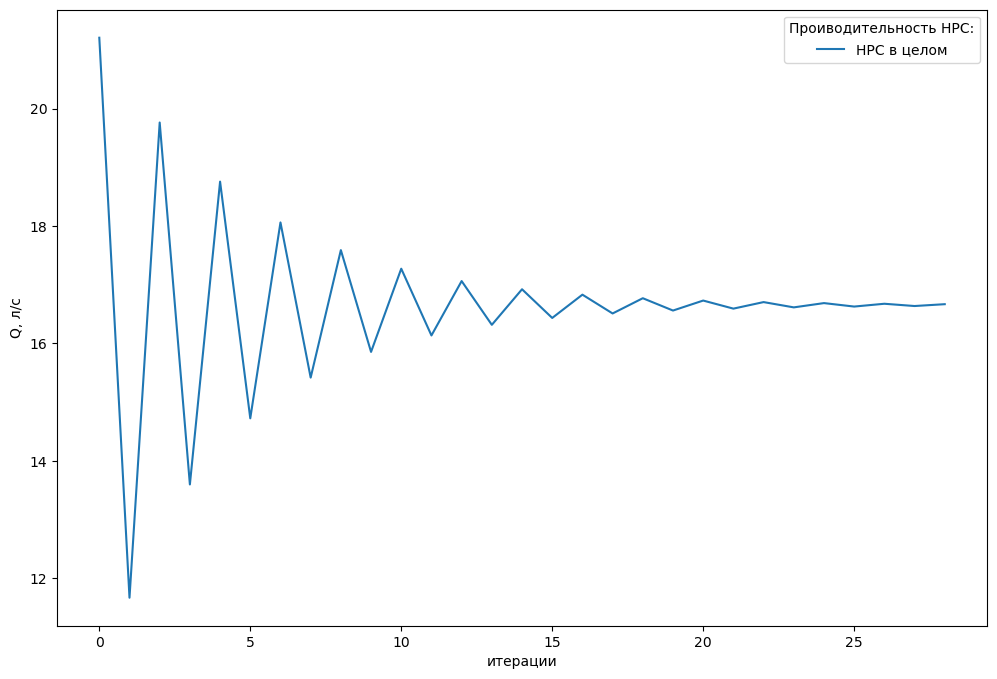

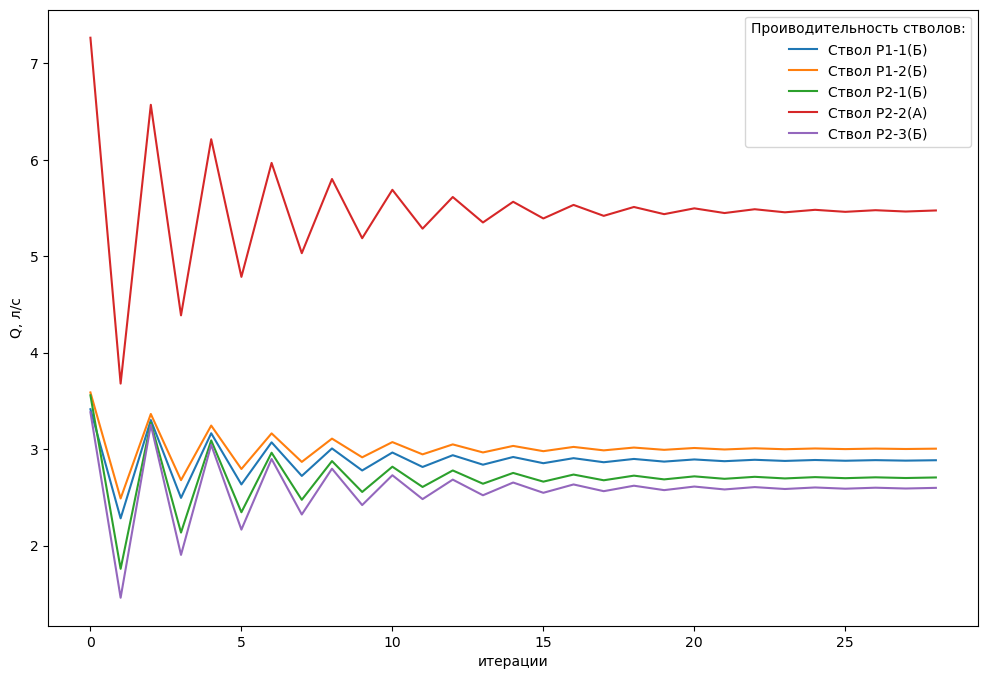

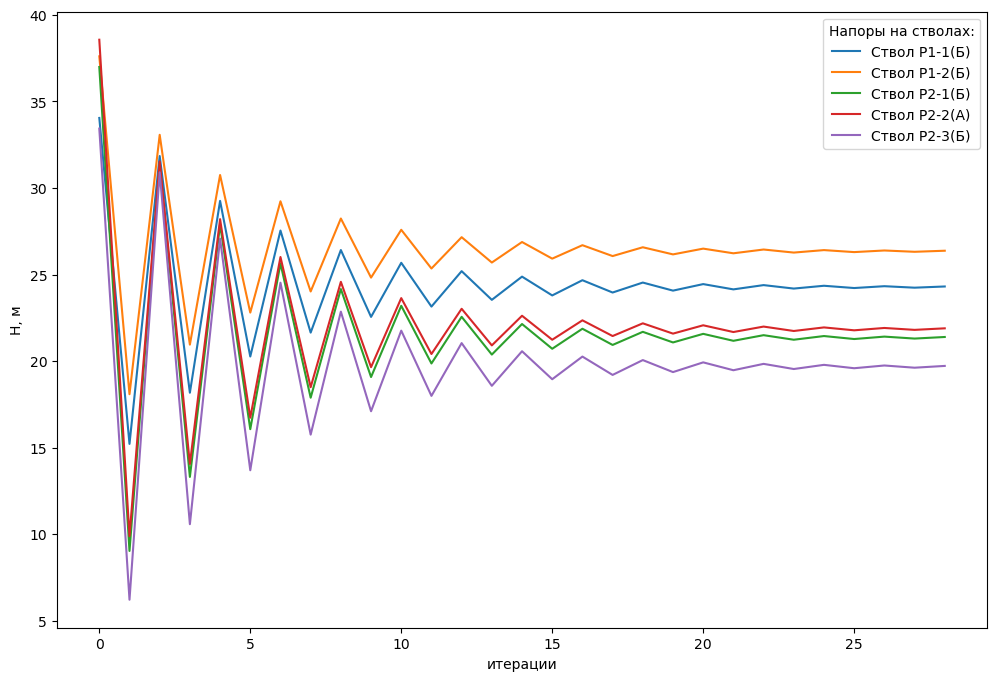

In [26]:
# Выводим графики (процесса приведения модели в стационарное состояние)
plotModelState()

In [ ]:
# Итоговые расходы:
printElementsQ()

Производительность насоса:  16.67482736678151 л/с
Производительность Ствол Р1-1(Б): 2.885433579579373 л/с
Производительность Ствол Р1-2(Б): 3.005289476639036 л/с
Производительность Ствол Р2-1(Б): 2.7072288307337433 л/с
Производительность Ствол Р2-2(А): 5.477222781569598 л/с
Производительность Ствол Р2-3(Б): 2.59965269825976 л/с


## Эксперимент 1-2
Модель: Модель 1
Условия:
* Увеличение напора на насосе до 80м

Задача:
* Рассчитать общий расход модели
* Рассчитать расходы на приборах подачи воды

In [ ]:
# Устанавливаем напор на насосе 80м
pump.set_H_add(80)

# Рассчитываем параметры модели
_, iters = model.calc(accuracy=0.05, fixStates=True)
print("потребовалось {} итераций".format(iters))
# Фиксируем состояние модели для 10 итераций
# model.calc(iters=10, fixStates=True)

# Печатаем итоговые расходы:
print("="*20)
printElementsQ()

потребовалось 27 итераций
Производительность насоса:  23.570225402724347 л/с
Производительность Ствол Р1-1(Б): 4.079099343482316 л/с
Производительность Ствол Р1-2(Б): 4.248831617667881 л/с
Производительность Ствол Р2-1(Б): 3.8264676366543062 л/с
Производительность Ствол Р2-2(А): 7.741875504419651 л/с
Производительность Ствол Р2-3(Б): 3.6739513005001934 л/с


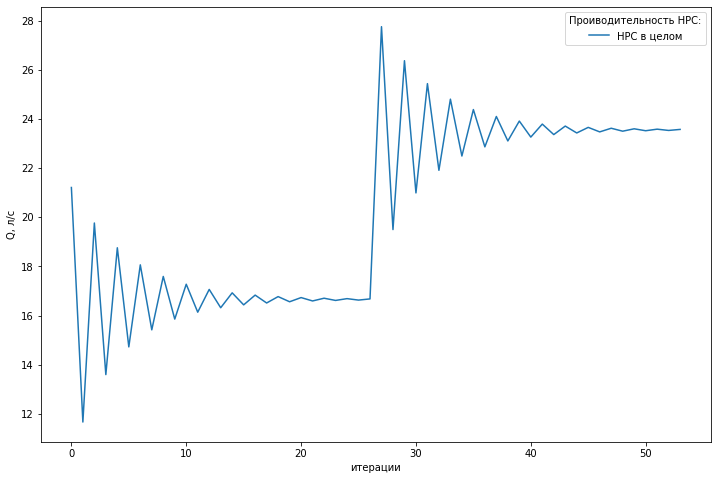

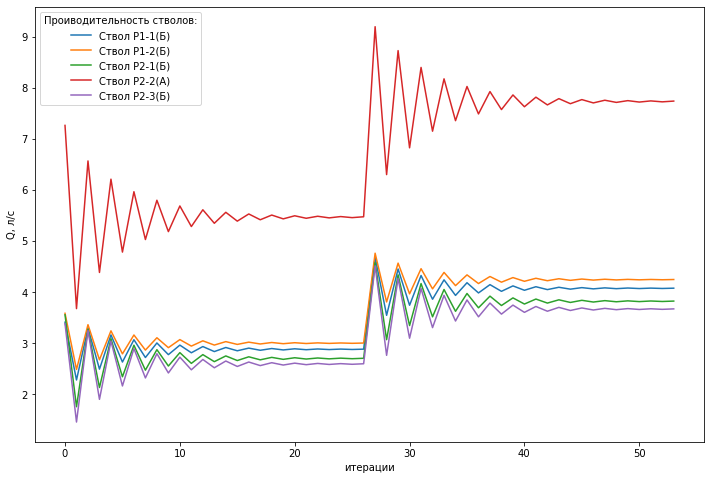

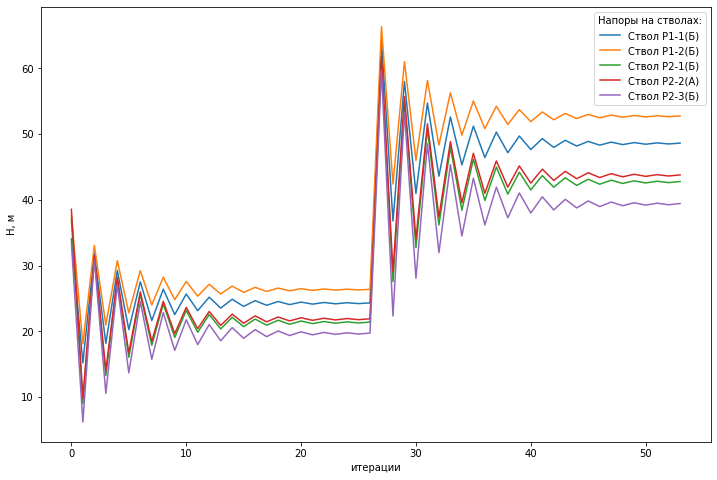

In [ ]:
# Выводим графики (процесса приведения модели в стационарное состояние)
plotModelState()

## Эксперимент 1-3
Модель: Модель 1
Условия:
* Перекроем ствол А (№4 в модели или nozzle_22)

Задача:
* Рассчитать общий расход модели
* Рассчитать расходы на приборах подачи воды

Производительность насоса:  17.919938248982366 л/с
Производительность Ствол Р1-1(Б): 4.448869587279255 л/с
Производительность Ствол Р1-2(Б): 4.634506163831091 л/с
Производительность Ствол Р2-1(Б): 4.508577481161757 л/с
Производительность Ствол Р2-2(А): 0.0 л/с
Производительность Ствол Р2-3(Б): 4.327985016710262 л/с


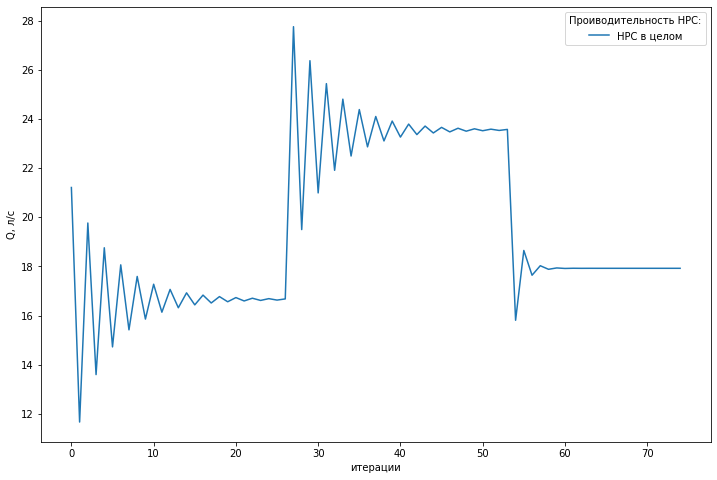

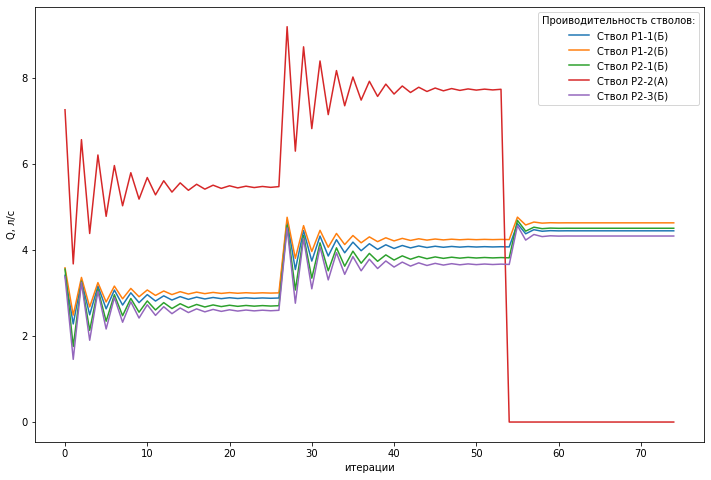

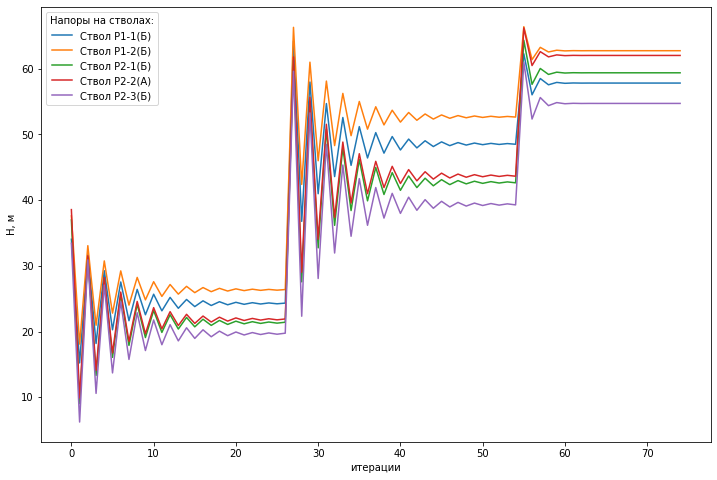

In [ ]:
# Устанавливаем проводимость насадка ствола А = 0
nozzle_22.p = 0
# pump.set_H_add(80)

# Рассчитываем параметры модели
# _, iters = model.calc(accuracy=0.05, fixStates=True)
# print("потребовалось {} итераций".format(iters))
# Фиксируем состояние модели для 10 итераций
model.calc(iters=20, fixStates=True)



# Печатаем итоговые расходы:
print("="*20)
printElementsQ()

plotModelState()